<a href="https://colab.research.google.com/github/mikhail-mat/statquest-illustrated-guide/blob/main/StatQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Trying out linear regression with my own values for x and y

In [ ]:
x = np.array([2.5, 3.2, 1.4, 8.7, 6.0, 3.4, 5.7]).reshape(-1, 1)
y = np.array([10.3, 13.1, 6.7, 17.3, 14.1, 12.7, 13.9]).reshape(-1, 1)

In [ ]:
x_train = x[:5]
y_train = y[:5]
x_test = x[5:]
y_test = y[5:]

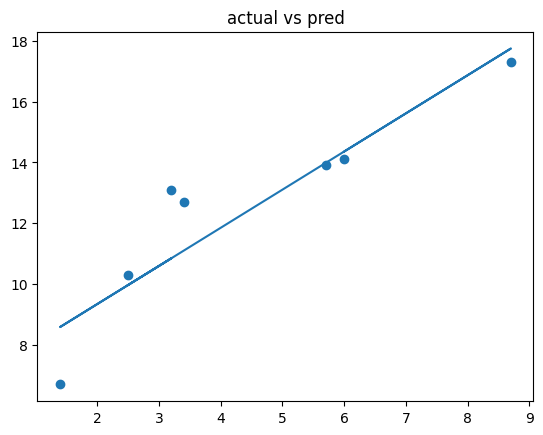

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
plt.scatter(x, y)
plt.plot(x_train, y_pred)
plt.title('actual vs pred')
plt.show()

# Linear regression manual implementation with gradient descent

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [12]:
file_path = "Student_Performance.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path
)

Using Colab cache for faster access to the 'student-performance-multiple-linear-regression' dataset.


In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
# Standardisation of features

numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for col in numeric_cols:
  mean = np.mean(df[col])
  std_dev = np.std(df[col])
  df[col] = (df[col] - mean) / std_dev

In [15]:
df.loc[df['Extracurricular Activities'] == 'Yes', 'Extracurricular Activities'] = 1
df.loc[df['Extracurricular Activities'] == 'No', 'Extracurricular Activities'] = 0
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91.0
1,-0.383481,0.723913,0,-1.492294,-0.900982,65.0
2,1.161410,-1.063626,1,0.276805,-0.900982,45.0
3,0.002742,-1.005963,1,-0.902594,-0.900982,36.0
4,0.775188,0.320275,0,0.866505,0.145333,66.0


In [16]:
feature_cols = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
X = df[feature_cols].values
y = df['Performance Index'].values #.reshape(-1, 1)

In [22]:
X.shape[0]

10000

In [23]:
def SSR(y_real, y_pred):
  residuals = y_real - y_pred
  squared_res = np.square(residuals)
  sum = np.sum(squared_res)
  return sum

In [24]:
def MSE(SSR, num_of_obs):
  return SSR / (num_of_obs*2)

In [25]:
def R2(y_real, y_pred):
  mean_val = np.mean(y_real)
  mean_ssr = SSR(y_real, mean_val)
  pred_ssr = SSR(y_real, y_pred)
  return (mean_ssr - pred_ssr) / mean_ssr

In [26]:
def predict(X, w, b):
  n = X.shape[0] # number of training examples
  y_pred = np.zeros(n) # create an 'empty' vector of predictions for the training examples
  for i in range(n):
    y_pred[i] = np.dot(X[i], w) + b # training example := dot product of X row and w vector
  return y_pred

In [43]:
def gradient_descent(X, y, epochs=100, lr=0.3):
  n = X.shape[0] # number of training examples
  m = X.shape[1] # number of features

  # initialise w vector and b to 0
  w = np.zeros(m)
  b = 0

  # w1_step = -1
  # b_step = -1

  cost_history = [] # keep track of cost as it is reducing

  for i in range(epochs): # perform 100 epochs
    y_pred = predict(X, w, b) # calculate vector of predicted y with current w and b
    residual = y_pred - y # vector of residuals

    # calculate derivatives
    dj_dw = np.zeros(m)
    for j in range(m):
      dj_dw[j] = np.dot(np.transpose(X)[j], residual) / n
    dj_db = np.sum(residual) / n

    # update parameters
    w -= dj_dw * lr
    b -= dj_db * lr

    # add cost to cost_history
    cost_history.append(MSE(SSR(y, y_pred), n))

    if i % 9 == 0: # every ten iterations
      print(f'Iteration: {i+1} – Cost: {cost_history[i]:2f} – ',
            f'dJ/dw1: {dj_dw[0]:2f} – dJ/db = {dj_db:2f} – ',
            f'w1: {w[0]:2f} – b: {b:2f}')

  return w, b, cost_history

In [44]:
w, b, cost_history = gradient_descent(X, y)

Iteration: 1 – Cost: 1709.432000 –  dJ/dw1: -7.179957 – dJ/db = -55.224800 –  w1: 2.153987 – b: 16.567440
Iteration: 10 – Cost: 28.884773 –  dJ/dw1: -0.323061 – dJ/db = -2.258700 –  w1: 7.125237 – b: 46.489556
Iteration: 19 – Cost: 11.137855 –  dJ/dw1: -0.017918 – dJ/db = -0.979723 –  w1: 7.358344 – b: 50.134219
Iteration: 28 – Cost: 5.196421 –  dJ/dw1: -0.002808 – dJ/db = -0.571041 –  w1: 7.375758 – b: 52.113906
Iteration: 37 – Cost: 3.150433 –  dJ/dw1: -0.001301 – dJ/db = -0.335073 –  w1: 7.380607 – b: 53.273901
Iteration: 46 – Cost: 2.445813 –  dJ/dw1: -0.000748 – dJ/db = -0.196637 –  w1: 7.383211 – b: 53.954624
Iteration: 55 – Cost: 2.203148 –  dJ/dw1: -0.000438 – dJ/db = -0.115396 –  w1: 7.384728 – b: 54.354106
Iteration: 64 – Cost: 2.119576 –  dJ/dw1: -0.000257 – dJ/db = -0.067720 –  w1: 7.385618 – b: 54.588541
Iteration: 73 – Cost: 2.090794 –  dJ/dw1: -0.000151 – dJ/db = -0.039741 –  w1: 7.386140 – b: 54.726119
Iteration: 82 – Cost: 2.080882 –  dJ/dw1: -0.000089 – dJ/db = -0.023

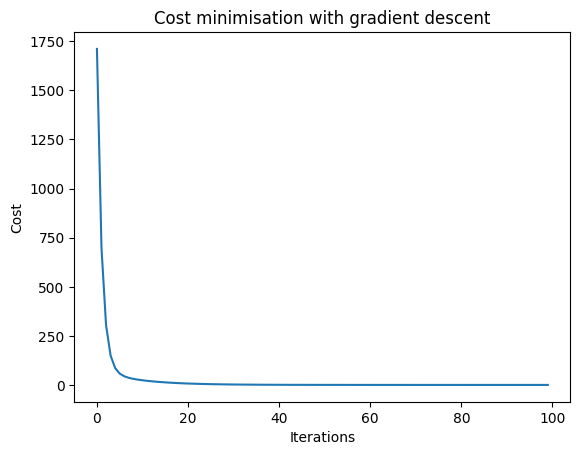

In [45]:
plt.plot(np.arange(100), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost minimisation with gradient descent')
plt.show()

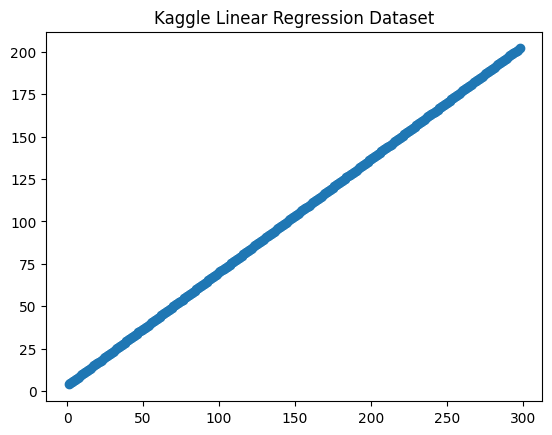

In [21]:
y_pred = w1 * x + b
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.title('Kaggle Linear Regression Dataset')
plt.show()

In [22]:
model = LinearRegression()

In [23]:
def k_fold_cross_val(k, df, model):
  # randomize the order of the data
  data = df.to_numpy()
  np.random.shuffle(data)

  # split the data into k equal groups
  k_folds = np.array_split(data, k)

  # iteratively select k-1 groups to be the training data and the one group
  # that is left to be the testing data
  mse_history = []
  r2_history = []

  for fold in range(len(k_folds)):
    x_test = k_folds[fold][:, 0].reshape(-1, 1)
    y_test = k_folds[fold][:, 1].reshape(-1, 1)

    parts = k_folds[:fold] + k_folds[fold+1:]
    x_train = np.vstack(parts)[:, 0].reshape(-1, 1)
    y_train = np.vstack(parts)[:, 1].reshape(-1, 1)

    # train the model using the training data
    model.fit(x_train, y_train)

    # evaluate using the testing data
    y_pred = model.predict(x_test)
    mse = MSE(SSR(y_test, y_pred), np.size(y_test))
    r2 = R2(y_test, y_pred)

    # keep track of the entire history of evaluations for the model
    mse_history.append(mse)
    r2_history.append(r2)

  # return the evaluation history
  return mse_history, r2_history

cv_mse, cv_r2 = k_fold_cross_val(10, df, model)

In [24]:
print(f'mean MSE after CV: {np.mean(cv_mse)}')
print(f'mean R2 after CV: {np.mean(cv_r2)}')

mean MSE after CV: 3.9615344220804875e-16
mean R2 after CV: 1.0
